# Trying to get the choropleth to work

Dataset Used: [Statistical GIS Boundary Files for London](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london)

Tutorial Link: [Choropleth for London Boroughs](https://medium.com/towards-data-science/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d)

Github Page: [make-a-map-geopandas](https://github.com/bendoesdata/make-a-map-geopandas/tree/master?tab=readme-ov-file)

In [15]:
# imports

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [16]:
# set the filepath and load in a shapefile
fp = "/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/Chorpleth Datasets/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"

# read file using gpd.read_file()
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


<Axes: >

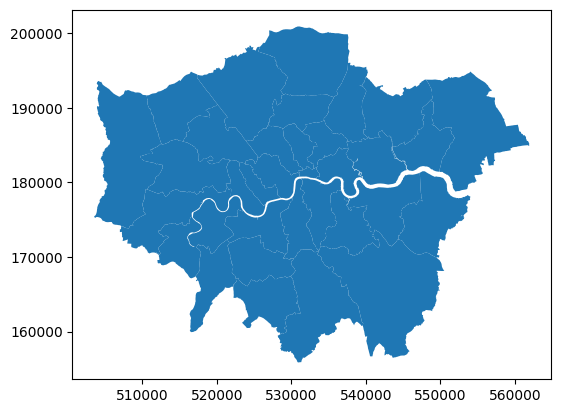

In [17]:
# plot the map

map_df.plot()

In [18]:
# load the data

df = pd.read_csv("/Users/s16teen/Downloads/Work/UOB/SEM2/ADS2/Tesco_Grocery_and_Educational_Attainment/Data/year_borough_grocery.csv")
df.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098


In [19]:
# join the geodataframe with the year_borough_grocery data

merged = map_df.set_index('GSS_CODE').join(df.set_index('area_id'))

merged.head()

,NAME,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,weight,weight_perc2.5,weight_perc25,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
GSS_CODE,,,,,,,,,,,,,,,,,,,,,
E09000021,Kingston upon Thames,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",297.379174,30.0,125.0,...,145265,171609.0,84301.0,87308.0,37534.0,111139.0,22936.0,37.072461,37.26,4605.716586
E09000008,Croydon,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",353.636123,30.0,150.0,...,824237,380070.0,184305.0,195765.0,93166.0,237511.0,49393.0,36.896435,86.57,4390.319972
E09000006,Bromley,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",319.336273,30.0,135.0,...,734232,325303.0,156274.0,169029.0,72176.0,196323.0,56804.0,39.853429,150.14,2166.664447
E09000018,Hounslow,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",336.922944,32.5,150.0,...,365032,266412.0,134797.0,131615.0,62349.0,173737.0,30326.0,35.741397,55.95,4761.608579
E09000009,Ealing,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",358.569245,35.0,154.0,...,1824981,344285.0,172747.0,171538.0,81217.0,222669.0,40399.0,36.143460,55.55,6197.749775


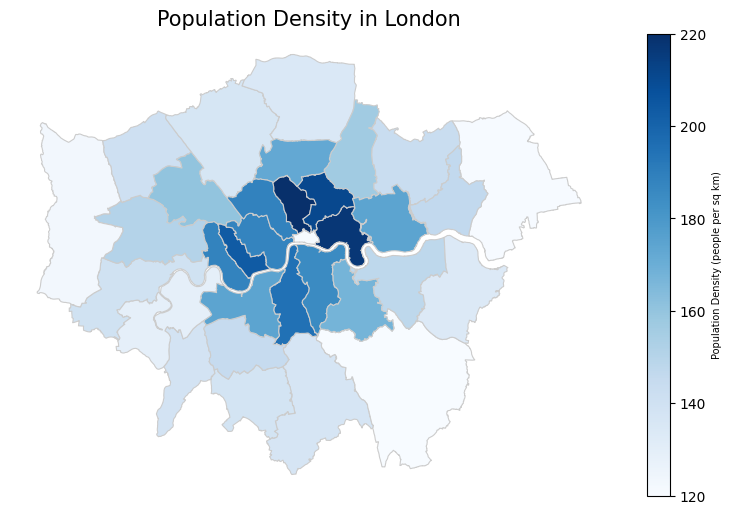

In [20]:
# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
merged.plot(column='people_per_sq_km', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Population Density in London', fontdict={'fontsize': '15'})

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm.set_array([])
sm.set_clim(vmin, vmax)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Population Density (people per sq km)', fontsize=7)
